In [62]:
from sentinelhub import SHConfig

config = SHConfig()
config.sh_client_id = "sh-1ed0ff4f-31e4-40cb-8f97-615c3cdac3cd"
config.sh_client_secret = "4IwKUim9aG4Q0Xpr6pXdh0wuWYv56OCp"
config.sh_base_url = 'https://sh.dataspace.copernicus.eu'
config.sh_token_url = 'https://identity.dataspace.copernicus.eu/auth/realms/CDSE/protocol/openid-connect/token'

In [63]:
# Let's do some imports first ...
import datetime
import os

import matplotlib.pyplot as plt
import numpy as np

from sentinelhub import (
    CRS,
    BBox,
    DataCollection,
    MimeType,
    SentinelHubRequest,
    bbox_to_dimensions
)

# ... and create our bounding box for the image we are looking for
coords_wgs84 = (-22.470300,63.863570,-22.331941,63.905205)
resolution = 10
bbox = BBox(bbox=coords_wgs84, crs=CRS.WGS84)
size = bbox_to_dimensions(bbox, resolution=resolution)

print(f"The image resolution is {resolution} m and the dimensions are {size} pixels")
# The image resolution is 10 m and the dimensions are (690, 449) pixels

The image resolution is 10 m and the dimensions are (690, 449) pixels


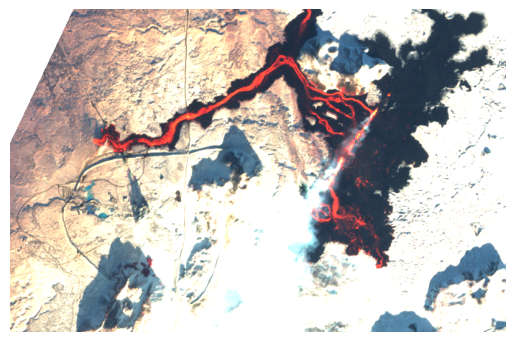

In [64]:
evalscript = """
    //VERSION=3

    function setup() {
        return {
            input: [{
                bands: ["B08", "B04", "B03"]
            }],
            output: {
                bands: 3
            }
        };
    }

    function evaluatePixel(sample) {
        return [2.5 * sample.B08, 2.5 * sample.B04, 2.5 * sample.B03];
    }
"""

request = SentinelHubRequest(
    evalscript=evalscript,
    input_data=[
        SentinelHubRequest.input_data(
            DataCollection.SENTINEL2_L1C.define_from("s2l1c", service_url=config.sh_base_url),
            time_interval=("2024-02-08", "2024-02-09"),
        )
    ],
    responses=[SentinelHubRequest.output_response("default", MimeType.PNG)],
    bbox=bbox,
    size=size,
    config=config,
)
imgs = request.get_data()
# Display the image using Matplotlib
plt.imshow(imgs[0])
plt.axis('off')
plt.show()
#plot_image(imgs[0], factor=2.5/255) # we scale the data between 0-1 and apply a brightness factor for a better visualisation

In [65]:
from sentinelhub import SentinelHubCatalog
catalog = SentinelHubCatalog(config=config)

coords_wgs84 = (35.050325,28.089308,35.347207,28.142850)
resolution = 15
bbox = BBox(bbox=coords_wgs84, crs=CRS.WGS84)

size = bbox_to_dimensions(bbox, resolution=resolution)
print(f"The image resolution is {resolution} m and the dimensions are {size} pixels")

time_interval = "2020-01-01", "2023-12-30"

search_iterator = catalog.search(
    DataCollection.SENTINEL2_L2A,
    bbox=bbox,
    time=time_interval,
    filter="eo:cloud_cover < 1",
    fields={"include": ["id", "properties.datetime", "properties.eo:cloud_cover"], "exclude": []},
)

results = list(search_iterator)

print("Total number of results:", len(results))

results

# The image resolution is 15 m and the dimensions are (1938, 431) pixels
# Total number of results: 575from sentinelhub import SentinelHubCatalog
catalog = SentinelHubCatalog(config=config)

coords_wgs84 = (35.050325,28.089308,35.347207,28.142850)
resolution = 15
bbox = BBox(bbox=coords_wgs84, crs=CRS.WGS84)

size = bbox_to_dimensions(bbox, resolution=resolution)
print(f"The image resolution is {resolution} m and the dimensions are {size} pixels")

time_interval = "2020-01-01", "2023-12-30"

search_iterator = catalog.search(
    DataCollection.SENTINEL2_L2A,
    bbox=bbox,
    time=time_interval,
    filter="eo:cloud_cover < 1",
    fields={"include": ["id", "properties.datetime", "properties.eo:cloud_cover"], "exclude": []},
)

results = list(search_iterator)

print("Total number of results:", len(results))

results

# The image resolution is 15 m and the dimensions are (1938, 431) pixels
# Total number of results: 575

The image resolution is 15 m and the dimensions are (1938, 431) pixels
Total number of results: 574
The image resolution is 15 m and the dimensions are (1938, 431) pixels
Total number of results: 574


[{'id': 'S2A_MSIL2A_20231226T082341_N0510_R121_T36RXS_20231226T112753.SAFE',
  'properties': {'datetime': '2023-12-26T08:32:12.338Z',
   'eo:cloud_cover': 0.06}},
 {'id': 'S2A_MSIL2A_20231226T082341_N0510_R121_T36RYS_20231226T112753.SAFE',
  'properties': {'datetime': '2023-12-26T08:32:08.92Z',
   'eo:cloud_cover': 0.08}},
 {'id': 'S2A_MSIL2A_20231223T081341_N0510_R078_T36RXS_20231223T111649.SAFE',
  'properties': {'datetime': '2023-12-23T08:22:18.748Z',
   'eo:cloud_cover': 0.45}},
 {'id': 'S2B_MSIL2A_20231218T081249_N0510_R078_T36RXS_20231218T094240.SAFE',
  'properties': {'datetime': '2023-12-18T08:22:22.177Z',
   'eo:cloud_cover': 0.4}},
 {'id': 'S2B_MSIL2A_20231218T081249_N0510_R078_T36RYS_20231218T094240.SAFE',
  'properties': {'datetime': '2023-12-18T08:22:16.41Z',
   'eo:cloud_cover': 0.26}},
 {'id': 'S2A_MSIL2A_20231216T082341_N0510_R121_T36RYS_20231216T113154.SAFE',
  'properties': {'datetime': '2023-12-16T08:32:07.948Z',
   'eo:cloud_cover': 0.42}},
 {'id': 'S2A_MSIL2A_20231

In [66]:
from sentinelhub import filter_times
import datetime as dt

time_difference = dt.timedelta(days=30)

all_timestamps = search_iterator.get_timestamps()
unique_acquisitions = filter_times(all_timestamps, time_difference)

len(unique_acquisitions)
# 45

45

In [67]:
process_requests = []

# set up evalscript
evalscript = """
    //VERSION=3

    function setup() {
        return {
            input: [{
                bands: ["B02", "B03", "B04"]
            }],
            output: {
                bands: 3
            }
        };
    }

    function evaluatePixel(sample) {
        return [2.5 * sample.B04, 2.5 * sample.B03, 2.5 * sample.B02];
    }
"""

# loop over timestamps
for timestamp in unique_acquisitions:

    request = SentinelHubRequest(
    evalscript=evalscript,
    input_data=[
        SentinelHubRequest.input_data(
            DataCollection.SENTINEL2_L1C.define_from("s2l1c", service_url=config.sh_base_url),
            time_interval=(timestamp - time_difference, timestamp + time_difference),
        )
    ],
    responses=[SentinelHubRequest.output_response("default", MimeType.PNG)],
    bbox=bbox,
    size=size,
    config=config,
    )

    process_requests.append(request)

# Download data with the SentinelHubDownloadClient
from sentinelhub import SentinelHubDownloadClient

client = SentinelHubDownloadClient(config=config)
download_requests = [request.download_list[0] for request in process_requests]
data = client.download(download_requests)

len(data)
# 45 (as expected)

45

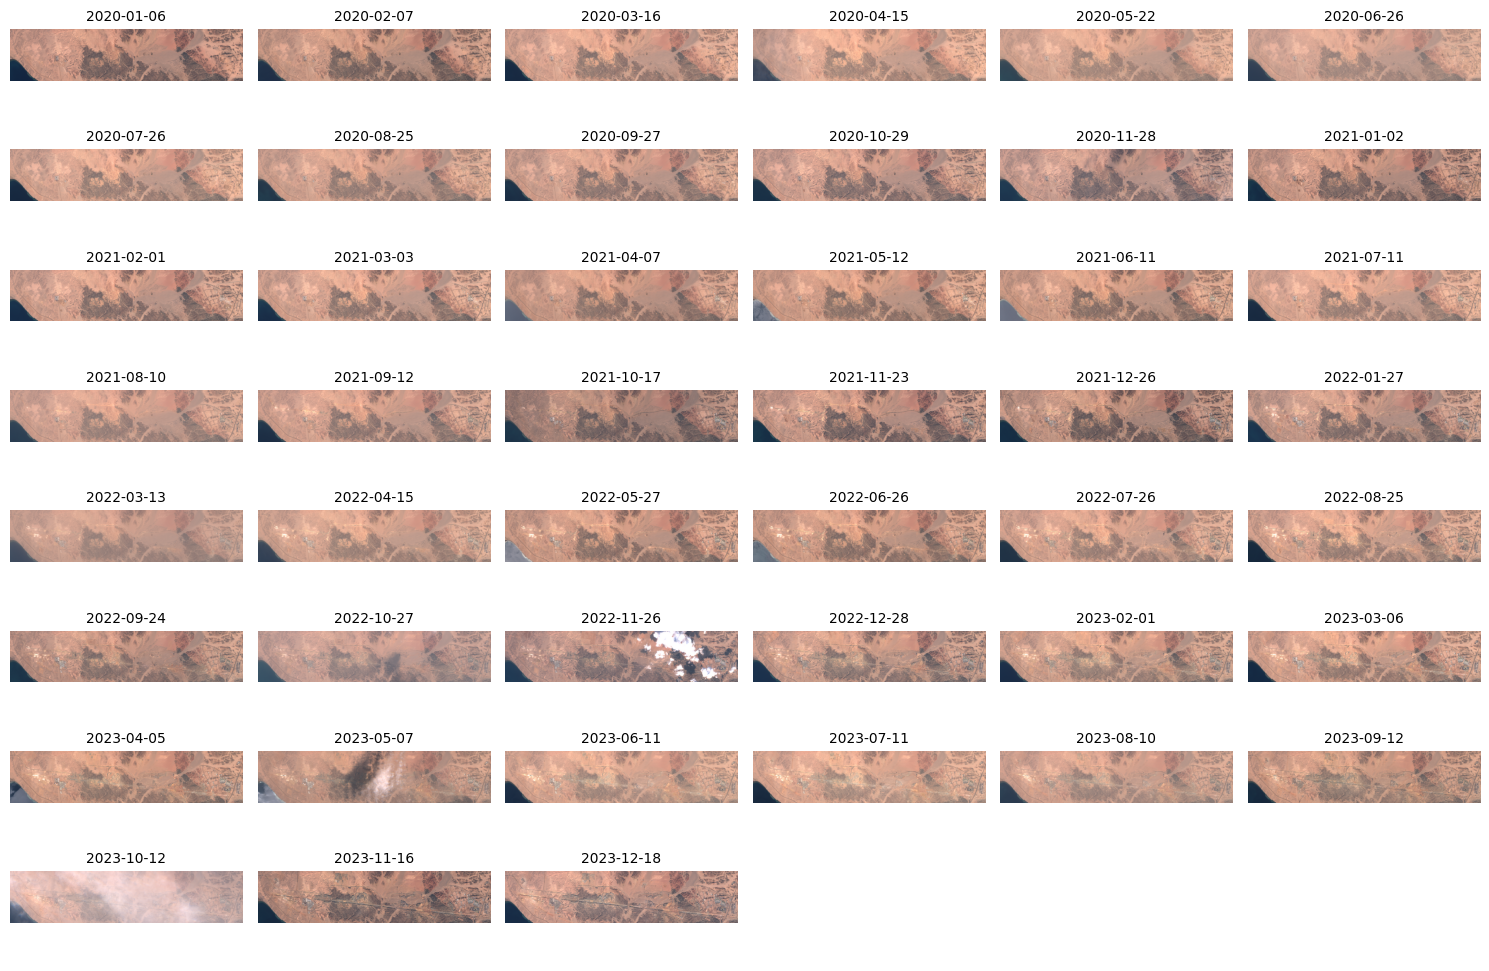

In [68]:
ncols, nrows = 6, 8

fig, axis = plt.subplots(
    ncols=ncols, nrows=nrows, figsize=(15, 10), subplot_kw={"xticks": [], "yticks": [], "frame_on": False}
)

for idx, (image, timestamp) in enumerate(zip(data, unique_acquisitions)):
    ax = axis[idx // ncols][idx % ncols]
    ax.imshow(np.clip(image * 1 / 255, 0, 1))
    ax.set_title(timestamp.date().isoformat(), fontsize=10)

plt.tight_layout()

In [69]:
from PIL import Image

img_collection = [Image.fromarray(img) for img in data]

print(img_collection)
# duration is the number of milliseconds between frames; this is 500 frames per second
img_collection[0].save("timelapse1.gif", save_all=True, append_images=img_collection[1:], duration=100, loop=0)

[<PIL.Image.Image image mode=RGB size=1938x431 at 0x2302405B1C0>, <PIL.Image.Image image mode=RGB size=1938x431 at 0x230286AA220>, <PIL.Image.Image image mode=RGB size=1938x431 at 0x230286AAD60>, <PIL.Image.Image image mode=RGB size=1938x431 at 0x230286AACA0>, <PIL.Image.Image image mode=RGB size=1938x431 at 0x230286AAC40>, <PIL.Image.Image image mode=RGB size=1938x431 at 0x230286AACD0>, <PIL.Image.Image image mode=RGB size=1938x431 at 0x230286AAC10>, <PIL.Image.Image image mode=RGB size=1938x431 at 0x230286AAF10>, <PIL.Image.Image image mode=RGB size=1938x431 at 0x230286AA730>, <PIL.Image.Image image mode=RGB size=1938x431 at 0x230286AABB0>, <PIL.Image.Image image mode=RGB size=1938x431 at 0x230286AA610>, <PIL.Image.Image image mode=RGB size=1938x431 at 0x230286AAB20>, <PIL.Image.Image image mode=RGB size=1938x431 at 0x230286AAE80>, <PIL.Image.Image image mode=RGB size=1938x431 at 0x230286AAFA0>, <PIL.Image.Image image mode=RGB size=1938x431 at 0x230286AA5B0>, <PIL.Image.Image image m